In [ ]:
from gprm.datasets import Reconstructions, Zircons, Rocks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pygmt

import matplotlib as mpl
mpl.rc('font',family='Helvetica')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

import sys
#sys.path.append('/Users/simon/OneDrive/Andes_works//python/')
sys.path.append('../../andes_paper/python/')
import joyful_geochemistry as joy
import joyful_mapping as joymap

%load_ext autoreload
%autoreload 2


In [ ]:
#gdf_2019 = Zircons.loadDB(version=2019)
gdf_2021 = Zircons.loadDB(version=2021)

gdf_2021 = df = joymap.select_orogens(gdf_2021,gdf=None, 
                                      orogen_names='Cordilleran', 
                                      continent_names='South America',
                                      region=[-100, -50, -60, 20])

gdf_Hf = Zircons.load_Hf()

gdf_Hf = gdf_Hf.rename(columns={'U-Pb    Age  (Ma)':'Age', 
                                'εHf(t)':'Hf'})


In [ ]:
lat_min = -60
lat_max = 10
age_max = 600

sam_Hf = gdf_Hf.cx[-100:-60, lat_min:lat_max]

sam_Hf = sam_Hf.query('Age<=@age_max')

#sam_Hf.plot()

In [ ]:
#plt.plot(sam_Hf['Age'],sam_Hf['Hf'], '.', alpha=0.2)
#plt.xlim(0,600)
#plt.ylim(-20,20)


In [ ]:
'''
for latitude_min in np.arange(-60,10,5):
    tmp = sam_Hf.cx[:, latitude_min:latitude_min+5]
    plt.figure(figsize=(8,3.5))
    plt.plot(sam_Hf['Age'],sam_Hf['Hf'], 'b.', alpha=0.1)
    plt.plot(tmp['Age'],tmp['Hf'], 'ro', alpha=0.5)
    plt.xlim(0,600)
    plt.ylim(-20,20)
    plt.title('{:0.0f} - {:0.0f}'.format(latitude_min,latitude_min+10))
    plt.show()
'''

/var/folders/k2/jz_0twls1q13vbr87bqwdtr40000gn/T/ipykernel_50247/35625983.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gp_medians = gps.median()['Hf'].unstack()
/var/folders/k2/jz_0twls1q13vbr87bqwdtr40000gn/T/ipykernel_50247/35625983.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gp_q25 = gps.quantile(.25)['Hf'].unstack()
/var/folders/k2/jz_0twls1q13vbr87bqwdtr40000gn/T/ipykernel_50247/35625983.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select 

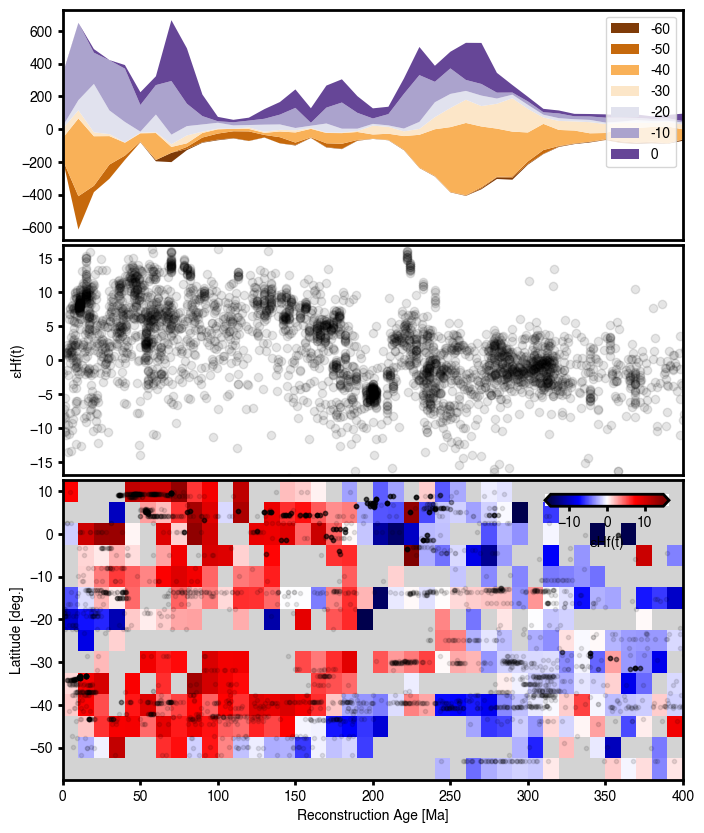

In [162]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

bin_size_degrees = 5
time_bin_size = 10


age_bins = np.arange(0,age_max+1,time_bin_size), 
lat_bins = np.arange(lat_min,lat_max+1,bin_size_degrees)

sam_Hf['bin_latitude'] = np.round(sam_Hf.geometry.y/bin_size_degrees) * bin_size_degrees
sam_Hf['bin_age'] = np.round(sam_Hf['Age']/time_bin_size) * time_bin_size
#p_groups = ppdat.groupby(by=['bin_age'])
#gp = sam_Hf.groupby(by=['bin_latitude','bin_age'])

gps = sam_Hf.groupby(['bin_age', 'bin_latitude'])
gp_medians = gps.median()['Hf'].unstack()
gp_q25 = gps.quantile(.25)['Hf'].unstack()
gp_q75 = gps.quantile(.75)['Hf'].unstack()
sz = gps.size().unstack()



res = np.histogram2d(gdf_2021['Latitude'], 
                     gdf_2021['Non_Iter_Age_Ma'], 
                     bins=[np.arange(-60,11,10), np.arange(0,501,10)])




fig = plt.figure(figsize=(8,10))
gs = fig.add_gridspec(nrows=3, ncols=1, wspace=0.1, hspace=.02, height_ratios=[1,1,1.3])


ax = fig.add_subplot(gs[0, 0])
ax.stackplot(res[2][:-1], res[0], 
             colors=plt.cm.PuOr(np.linspace(0,1,len(res[1]))),
             baseline='wiggle',
             labels=res[1])
ax.set_xlim(0,400)
ax.set_xticks([])
ax.legend()


ax = fig.add_subplot(gs[1, 0])
ax.plot(sam_Hf['Age'],sam_Hf['Hf'], 'ko', alpha=0.1)
#cm = ax.scatter(sam_Hf['Age'],sam_Hf['Hf'], c=sam_Hf['Latitude'], s=5, cmap='cividis')
ax.set_xlim(0,400)
ax.set_ylim(-17,17)
ax.set_ylabel('εHf(t)')
ax.set_xticks([])

#cax = inset_axes(ax, width="20%", height="4%", loc='upper right', borderpad=1.)
#cbar = plt.colorbar(cm, cax=cax, orientation='horizontal', extend='both')
#cax.xaxis.set_ticks_position("bottom")
#cbar.ax.set_xlabel('Latitude')

ax = fig.add_subplot(gs[2, 0])
cm = ax.pcolormesh(np.arange(0,age_max+1,time_bin_size), 
               np.arange(lat_min,lat_max+1,bin_size_degrees)+bin_size_degrees/2, 
               np.array(gp_medians).T, 
               cmap='seismic', vmin=-15, vmax=15)
ax.plot(sam_Hf['Age'], sam_Hf['Latitude'], 'k.', alpha=0.1)
ax.set_xlim(0,400)
#plt.colorbar(cm, label='εHf(t)', extend='both')
cax = inset_axes(ax, width="20%", height="4%", loc='upper right', borderpad=1.)
cbar = plt.colorbar(cm, cax=cax, orientation='horizontal', extend='both')
cax.xaxis.set_ticks_position("bottom")
cbar.ax.set_xlabel('εHf(t)')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Reconstruction Age [Ma]')
ax.set_ylabel('Latitude [deg.]')
plt.savefig('../images/Andes_Hafnium.png', dpi=600)
plt.show()


In [ ]:
import seaborn as sns
bin_size = 2
tmp = gdf_2021.copy(deep=True)
tmp['lat_bin'] = np.round(tmp['Latitude']/bin_size)*bin_size 


fig,ax = plt.subplots(figsize=(7,6))
sns.stripplot(x='Non_Iter_Age_Ma', y='lat_bin', data=tmp, 
              #order=['orthogneiss', 'granite', 'granodiorite', 'granitic gneiss', 'tuff (bedded ash)',
              #       'tonalite', 'monzogranite', 'granulite', 'rhyolite', 'diorite', 'gabbro'],
               alpha=0.1, color='k', jitter=0.45, size=3,
             orient='h', ax=ax)
ax.set_xlim(0,400)
ax.set_ylim(ax.get_ylim()[::-1])



In [ ]:
M2022 = Reconstructions.fetch_Muller2022()

gdf_Hf_M2022 = M2022.assign_plate_ids(gdf_Hf, polygons='continents', keep_unpartitioned_features=False)

In [ ]:
time_step = 20

for reconstruction_time in np.arange(0,1000,time_step):

    tmp = gdf_Hf_M2022.query('Age>@reconstruction_time-@time_step/2 & Age<@reconstruction_time+@time_step/2')
    
    tmp = M2022.reconstruct(tmp, reconstruction_time)
    
    result = pygmt.blockmedian(x=tmp.geometry.x, y=tmp.geometry.y, z=tmp.Hf, region='d', spacing='2.5d', C=True)
    

    title = '{:0.0f} Ma'.format(reconstruction_time)
    
    fig = pygmt.Figure()
    fig.basemap(projection='N25c', region='d', frame=["af", f"wsne+t{title}"])
    #fig.coast(land='grey')
    M2022.polygon_snapshot('continents', reconstruction_time+0.001).plot(fig, fill='grey80', pen='0p,gray80')
    #M2022.plate_snapshot(reconstruction_time+0.01).plot_boundaries(fig, pen='0.5p,darkgrey')
    plates = M2022.plate_snapshot(reconstruction_time)
    plates.plot_subduction_zones(fig, pen='1p,darkgrey', fill='darkgrey')
    plates.plot_mid_ocean_ridges(fig, pen='1p,darkgrey')
    pygmt.makecpt(cmap='polar', series=[-15,15,1], background='o')
    fig.plot(x=result.iloc[:,0], y=result.iloc[:,1], fill=result.iloc[:,2], style='c0.18c', pen='0.05p,black', cmap=True)
    fig.savefig('../images/sequence_M2021/global_hafnium_{:0.0f}Ma.png'.format(reconstruction_time))
    #fig.show(width=900)
    
    #break